## Ejercicios de pair programming 3 enero: Limpieza III

In [6]:
#Importamos todas las librerias a utilizar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,8)

pd.options.display.max_columns = None

In [3]:
#Abrimos el archivo y lo guardamos el df
df = pd.read_csv("../datos/tiburon6.csv", index_col=0)

In [4]:
df.head()

,case_number,year,type,country,activity,injury,mes,deceso,genero,especies,edad
0,2018.06.25,2018,Boating,usa,Paddling,"No injury to occupant, outrigger canoe and pad...",Jun,N,F,White,57.0
1,2018.06.03.a,2018,Unprovoked,brazil,Swimming,FATAL,Jun,Y,M,Tiger,18.0
2,2018.05.26.b,2018,Unprovoked,usa,Walking,Lower left leg bitten,May,N,M,Bull,15.0
3,2018.05.24,2018,Provoked,australia,Feeding sharks,Minor bite to hand by captive shark. PROVOKED ...,May,N,M,Grey,32.0
4,2018.05.13.a,2018,Invalid,england,Fishing,Injured by teeth of a dead porbeagle shark he ...,May,N,M,Unspecified,21.0


1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?


Sobre las columnas numéricas de 'year' y edad.

In [5]:
#Separamos las columnas numéricas y lo guardamos en df_numericas
df_numericas = df.select_dtypes(include=np.number)
df_numericas.head()

,year,edad
0,2018,57.0
1,2018,18.0
2,2018,15.0
3,2018,32.0
4,2018,21.0


2. Identifica visualmente los outliers


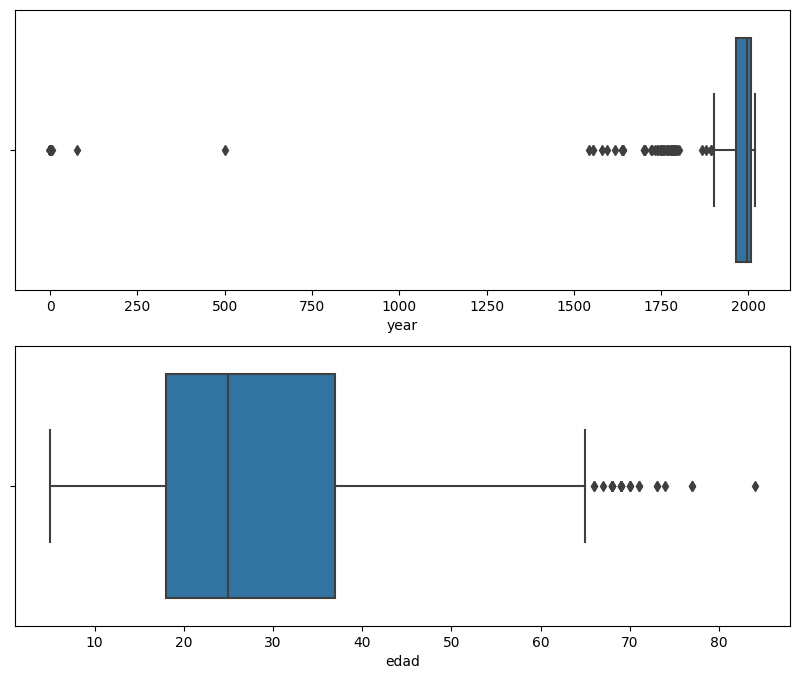

In [7]:
#Hacemos un boxplot para ver los outliers. Lo hacemos mediante un for loop para representar los boxplots de ambas columnas de df_numercias
fig, ax = plt.subplots(2, 1)

for i, columna in enumerate(df_numericas.columns):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

3. Identifica sobre el dataframe las filas que son outliers


In [9]:
lista_columnas = df_numericas.columns.tolist() #Sacamos la lista de los nombres de las columnas para usarlo luego en el for loop.
lista_columnas

['year', 'edad']

In [10]:

dicc_indices = {} 

#Creamos un for loop para calcular el rango de los outliers y almacenarlo en el diccionario_indices con el nombre de la columna como key y los indices de los outliers como values
for col in lista_columnas:
    
    Q1 = np.nanpercentile(df[col], 25)#Calculamos Q1 y Q3 con nan percentil 25 y 75
    Q3 = np.nanpercentile(df[col], 75)
    
    IQR = Q3 - Q1 #Calculamos el IQR como la diferencia de Q3 y Q1
    
    
    outlier_step = 1.5 * IQR 
    
   
    outliers_data = df_numericas[(df_numericas[col] < Q1 - outlier_step) | (df_numericas[col] > Q3 + outlier_step)] # filtramos el dataset con los valores que están por detras y por delante del bigote para tener solo los outliers
    
    display (outliers_data) #Vemos los outliers como dataset

    if outliers_data.shape[0] > 0:     
        dicc_indices[col] = (list(outliers_data.index)) # Añadimos los indices del dataset y el nombre de la columna a dicc_indices
    
    print (dicc_indices)

,year,edad
1498,1894,19.0
1499,1892,21.0
1500,1880,12.0
1501,1868,35.0
1502,1800,NaN
...,...,...
1667,0,NaN
1668,0,NaN
1669,0,NaN
1670,0,NaN


{'year': [1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 

,year,edad
12,2018,69.0
30,2017,69.0
51,2016,73.0
80,2016,69.0
84,2015,71.0
121,2015,68.0
139,2015,71.0
141,2015,70.0
184,2014,66.0
202,2013,74.0


{'year': [1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 

In [11]:
print (dicc_indices) #Estas serían los indices de las filas que son outliers

{'year': [1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 

4. Reemplaza los outliers por el estadístico más correcto.


In [15]:
#Para reemplazar los outliers creamos un for loop para hacerlo en ambas columnas
for key, value in dicc_indices.items():
    mediana = df[key].median() # calculamos la mediana para cada una de las columnas que tenemos en nuestro diccionario para reemplazar los valores de los outliers por la mediana 
    for i in value: # iteremos por la lista de valores para cada columna y reemplazamos los valores por la mediana
        df.loc[i,key] = mediana

In [13]:
df.head()

,case_number,year,type,country,activity,injury,mes,deceso,genero,especies,edad
0,2018.06.25,2018,Boating,usa,Paddling,"No injury to occupant, outrigger canoe and pad...",Jun,N,F,White,57.0
1,2018.06.03.a,2018,Unprovoked,brazil,Swimming,FATAL,Jun,Y,M,Tiger,18.0
2,2018.05.26.b,2018,Unprovoked,usa,Walking,Lower left leg bitten,May,N,M,Bull,15.0
3,2018.05.24,2018,Provoked,australia,Feeding sharks,Minor bite to hand by captive shark. PROVOKED ...,May,N,M,Grey,32.0
4,2018.05.13.a,2018,Invalid,england,Fishing,Injured by teeth of a dead porbeagle shark he ...,May,N,M,Unspecified,21.0


In [17]:
df_numericas = df.select_dtypes(include=np.number)

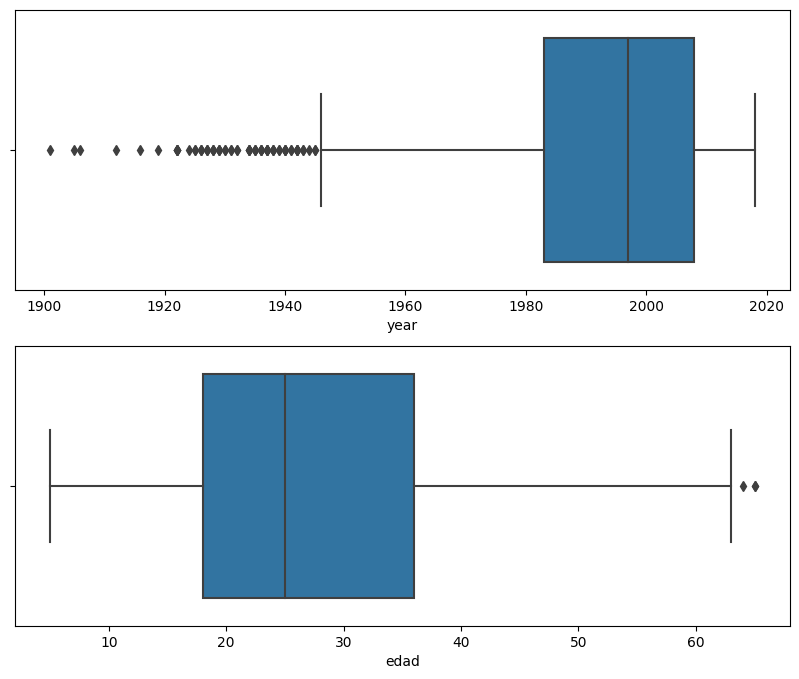

In [18]:
#Comprobamos que los valores han sido cambiados con el boxplot
fig, ax = plt.subplots(2, 1)

for i, columna in enumerate(df_numericas.columns):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [19]:
df.to_csv('../datos/tiburon7.csv')